In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 320
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0010_1000"
MODEL_NAME = "0010_1000-64-convsim-xxc3"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0299
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.4778

from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate=0.0005)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
        dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
        dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/
Noisy files:20137
Nitid files:20137
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/validation/
Noisy files:4872
Nitid files:4872


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME \
                                      + "_checkpoint_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 50, \
                 callbacks=[model_checkpoint_callback] )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/320
630/630 [==============================] - 11s 10ms/step - loss: 0.0734 - val_loss: 0.0643
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_01-0.06\assets
Epoch 2/320
  7/630 [..............................] - ETA: 12s - loss: 0.0715

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0679 - val_loss: 0.0627
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_02-0.06\assets
Epoch 3/320
  9/630 [..............................] - ETA: 8s - loss: 0.0681

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0670 - val_loss: 0.0602
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_03-0.06\assets
Epoch 4/320
  9/630 [..............................] - ETA: 8s - loss: 0.0662

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0662 - val_loss: 0.0600
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_04-0.06\assets
Epoch 5/320
  9/630 [..............................] - ETA: 9s - loss: 0.0657

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0654 - val_loss: 0.0609
Epoch 6/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0646 - val_loss: 0.0601
Epoch 7/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0641 - val_loss: 0.0640
Epoch 8/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0636 - val_loss: 0.0603
Epoch 9/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0629 - val_loss: 0.0567
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_09-0.06\assets
Epoch 10/320
  9/630 [..............................] - ETA: 8s - loss: 0.0621

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0623 - val_loss: 0.0614
Epoch 11/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0619 - val_loss: 0.0662
Epoch 12/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0614 - val_loss: 0.0597
Epoch 13/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0611 - val_loss: 0.0566
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_13-0.06\assets
Epoch 14/320
  7/630 [..............................] - ETA: 11s - loss: 0.0561

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0605 - val_loss: 0.0567
Epoch 15/320
630/630 [==============================] - 6s 10ms/step - loss: 0.0604 - val_loss: 0.0592
Epoch 16/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0601 - val_loss: 0.0561
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_16-0.06\assets
Epoch 17/320
  7/630 [..............................] - ETA: 12s - loss: 0.0629

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 9ms/step - loss: 0.0599 - val_loss: 0.0550
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_17-0.05\assets
Epoch 18/320
  9/630 [..............................] - ETA: 8s - loss: 0.0616

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0598 - val_loss: 0.0564
Epoch 19/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0594 - val_loss: 0.0591
Epoch 20/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0594 - val_loss: 0.0550
Epoch 21/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0591 - val_loss: 0.0622
Epoch 22/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0590 - val_loss: 0.0593
Epoch 23/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0588 - val_loss: 0.0555
Epoch 24/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0586 - val_loss: 0.0582
Epoch 25/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0585 - val_loss: 0.0561
Epoch 26/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0583 - val_loss: 0.0569
Epoch 27/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0582 - val_loss:

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 9ms/step - loss: 0.0580 - val_loss: 0.0592
Epoch 29/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0579 - val_loss: 0.0584
Epoch 30/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0578 - val_loss: 0.0556
Epoch 31/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0577 - val_loss: 0.0551
Epoch 32/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0575 - val_loss: 0.0544
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_32-0.05\assets
Epoch 33/320
  9/630 [..............................] - ETA: 8s - loss: 0.0574

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 9ms/step - loss: 0.0573 - val_loss: 0.0557
Epoch 34/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0574 - val_loss: 0.0583
Epoch 35/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0573 - val_loss: 0.0560
Epoch 36/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0572 - val_loss: 0.0562
Epoch 37/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0570 - val_loss: 0.0609
Epoch 38/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0569 - val_loss: 0.0537
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_38-0.05\assets
Epoch 39/320
  9/630 [..............................] - ETA: 9s - loss: 0.0604

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0568 - val_loss: 0.0537
Epoch 40/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0567 - val_loss: 0.0544
Epoch 41/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0567 - val_loss: 0.0528
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_41-0.05\assets
Epoch 42/320
 13/630 [..............................] - ETA: 8s - loss: 0.0559

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0564 - val_loss: 0.0668
Epoch 43/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0565 - val_loss: 0.0558
Epoch 44/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0564 - val_loss: 0.0566
Epoch 45/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0562 - val_loss: 0.0535
Epoch 46/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0563 - val_loss: 0.0616
Epoch 47/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0561 - val_loss: 0.0546
Epoch 48/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0562 - val_loss: 0.0538
Epoch 49/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0560 - val_loss: 0.0524
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_49-0.05\assets
Epoch 50/320
  9/630 [..............................] - ETA: 8s - los

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 9ms/step - loss: 0.0558 - val_loss: 0.0560
Epoch 51/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0559 - val_loss: 0.0546
Epoch 52/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0558 - val_loss: 0.0544
Epoch 53/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0557 - val_loss: 0.0572
Epoch 54/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0557 - val_loss: 0.0541
Epoch 55/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0557 - val_loss: 0.0541
Epoch 56/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0556 - val_loss: 0.0546
Epoch 57/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0557 - val_loss: 0.0568
Epoch 58/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0557 - val_loss: 0.0544
Epoch 59/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0554 - val_loss: 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0550 - val_loss: 0.0611
Epoch 72/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0548 - val_loss: 0.0556
Epoch 73/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0548 - val_loss: 0.0524
Epoch 74/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0547 - val_loss: 0.0566
Epoch 75/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0548 - val_loss: 0.0572
Epoch 76/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0547 - val_loss: 0.0554
Epoch 77/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0546 - val_loss: 0.0527
Epoch 78/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0547 - val_loss: 0.0576
Epoch 79/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0546 - val_loss: 0.0555
Epoch 80/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0546 - val_loss:

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0544 - val_loss: 0.0529
Epoch 86/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0544 - val_loss: 0.0536
Epoch 87/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0543 - val_loss: 0.0628
Epoch 88/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0542 - val_loss: 0.0567
Epoch 89/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0542 - val_loss: 0.0532
Epoch 90/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0541 - val_loss: 0.0595
Epoch 91/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0542 - val_loss: 0.0519
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3_checkpoint__weights_91-0.05\assets
Epoch 92/320
 13/630 [..............................] - ETA: 8s - loss: 0.0557

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0542 - val_loss: 0.0561
Epoch 93/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0542 - val_loss: 0.0551
Epoch 94/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0541 - val_loss: 0.0550
Epoch 95/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0541 - val_loss: 0.0540
Epoch 96/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0540 - val_loss: 0.0537
Epoch 97/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0540 - val_loss: 0.0526
Epoch 98/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0540 - val_loss: 0.0523
Epoch 99/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0540 - val_loss: 0.0528
Epoch 100/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0539 - val_loss: 0.0691
Epoch 101/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0539 - val_los

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 9ms/step - loss: 0.0536 - val_loss: 0.0518
Epoch 108/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0537 - val_loss: 0.0564
Epoch 109/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0536 - val_loss: 0.0576
Epoch 110/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0537 - val_loss: 0.0544
Epoch 111/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0536 - val_loss: 0.0546
Epoch 112/320
630/630 [==============================] - 6s 10ms/step - loss: 0.0536 - val_loss: 0.0560
Epoch 113/320
630/630 [==============================] - 6s 10ms/step - loss: 0.0535 - val_loss: 0.0557
Epoch 114/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0535 - val_loss: 0.0570
Epoch 115/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0535 - val_loss: 0.0524
Epoch 116/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0536 -

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0533 - val_loss: 0.0559
Epoch 124/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0533 - val_loss: 0.0526
Epoch 125/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0533 - val_loss: 0.0552
Epoch 126/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0533 - val_loss: 0.0534
Epoch 127/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0532 - val_loss: 0.0523
Epoch 128/320
630/630 [==============================] - 5s 9ms/step - loss: 0.0532 - val_loss: 0.0517
Epoch 129/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0532 - val_loss: 0.0531
Epoch 130/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0532 - val_loss: 0.0516
Epoch 131/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0532 - val_loss: 0.0524
Epoch 132/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0532 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0526 - val_loss: 0.0511
Epoch 170/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0524 - val_loss: 0.0566
Epoch 171/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0525 - val_loss: 0.0541
Epoch 172/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0525 - val_loss: 0.0513
Epoch 173/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0524 - val_loss: 0.0514
Epoch 174/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0524 - val_loss: 0.0576
Epoch 175/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0524 - val_loss: 0.0505
Epoch 176/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0524 - val_loss: 0.0568
Epoch 177/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0525 - val_loss: 0.0535
Epoch 178/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0523 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0519 - val_loss: 0.0519
Epoch 212/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0519 - val_loss: 0.0543
Epoch 213/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0519 - val_loss: 0.0580
Epoch 214/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0519 - val_loss: 0.0521
Epoch 215/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0519 - val_loss: 0.0564
Epoch 216/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0519 - val_loss: 0.0542
Epoch 217/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0518 - val_loss: 0.0510
Epoch 218/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0519 - val_loss: 0.0512
Epoch 219/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0518 - val_loss: 0.0626
Epoch 220/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0519 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 10ms/step - loss: 0.0517 - val_loss: 0.0531
Epoch 231/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0517 - val_loss: 0.0515
Epoch 232/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0517 - val_loss: 0.0517
Epoch 233/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0517 - val_loss: 0.0538
Epoch 234/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0518 - val_loss: 0.0540
Epoch 235/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0516 - val_loss: 0.0589
Epoch 236/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0517 - val_loss: 0.0525
Epoch 237/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0517 - val_loss: 0.0533
Epoch 238/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0516 - val_loss: 0.0520
Epoch 239/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0516 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


630/630 [==============================] - 6s 9ms/step - loss: 0.0515 - val_loss: 0.0531
Epoch 266/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0514 - val_loss: 0.0562
Epoch 267/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0514 - val_loss: 0.0568
Epoch 268/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0514 - val_loss: 0.0654
Epoch 269/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0514 - val_loss: 0.0615
Epoch 270/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0514 - val_loss: 0.0591
Epoch 271/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0513 - val_loss: 0.0519
Epoch 272/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0514 - val_loss: 0.0506
Epoch 273/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0514 - val_loss: 0.0530
Epoch 274/320
630/630 [==============================] - 6s 9ms/step - loss: 0.0514 - v

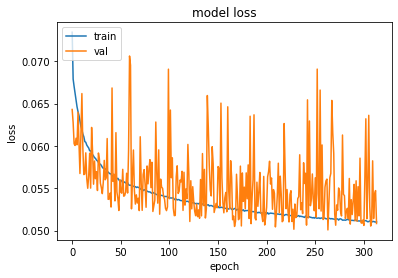

Best Epoch:264


In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0010_1000-64-convsim-xxc3\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Black image found
Images count =4872
Best RMSENZ  =4352 (0.89)
Best MAENZ   =4374 (0.90)
Best PSNR    =4352 (0.89)
Best Accuracy=4430 (0.91)
RMSE-NZ  Pred=0.0625  Noisy=0.1609
MAE-NZ   Pred=0.0518  Noisy=0.1527
PSNR     Pred=14.8 dB Noisy=7.1 dB
Accuracy Pred=0.22    Noisy=0.08
SSM      Pred=0.82    Noisy=0.46
HOG MSE  Pred=0.15    Noisy=0.21


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_1_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_1_nitid_idx076.tif


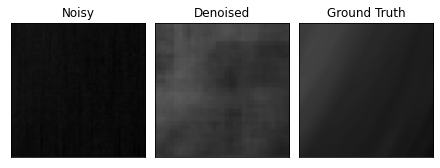

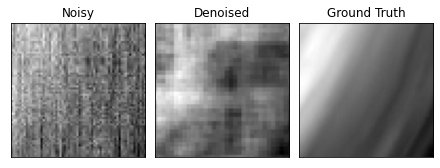

RMSE-NZ  Pred=0.0894  Noisy=0.1093 BEST
MAE-NZ   Pred=0.0838  Noisy=0.1013 BEST
PSNR     Pred=9.5 dB Noisy=7.7 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.77    Noisy=0.34
HOG MSE  Pred=0.35    Noisy=0.40
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_2_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_00_00_2_nitid_idx076.tif


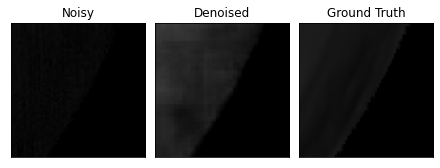

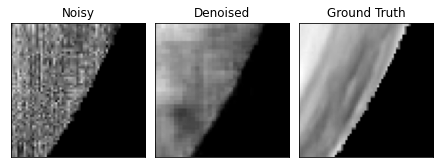

RMSE-NZ  Pred=0.0553  Noisy=0.0422 WORST
MAE-NZ   Pred=0.0423  Noisy=0.0346 WORST
PSNR     Pred=6.7 dB Noisy=9.1 dB WORST
Accuracy Pred=0.32    Noisy=0.23 BEST
SSM      Pred=0.82    Noisy=0.58
HOG MSE  Pred=0.09    Noisy=0.05
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0044_01_00_8_nitid_idx076.tif


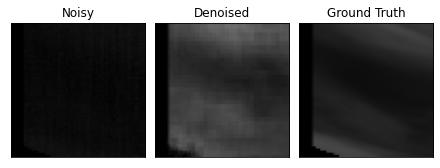

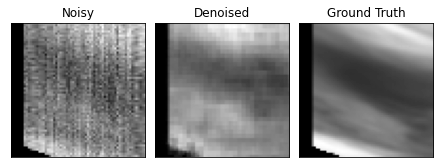

RMSE-NZ  Pred=0.1062  Noisy=0.0976 WORST
MAE-NZ   Pred=0.0966  Noisy=0.0842 WORST
PSNR     Pred=8.3 dB Noisy=9.1 dB WORST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.70    Noisy=0.28
HOG MSE  Pred=0.10    Noisy=0.23
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_00_5_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_00_5_nitid_idx076.tif


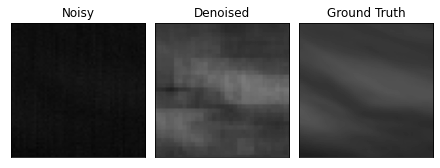

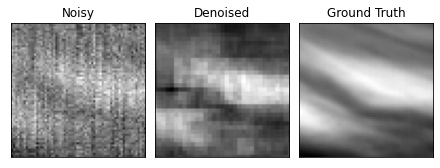

RMSE-NZ  Pred=0.0624  Noisy=0.1790 BEST
MAE-NZ   Pred=0.0508  Noisy=0.1749 BEST
PSNR     Pred=14.6 dB Noisy=5.4 dB BEST
Accuracy Pred=0.12    Noisy=0.00 BEST
SSM      Pred=0.82    Noisy=0.34
HOG MSE  Pred=0.20    Noisy=0.46
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_01_6_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0066_01_01_6_nitid_idx076.tif


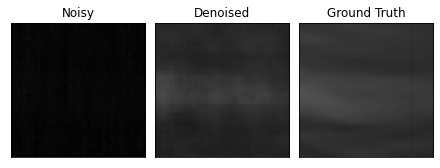

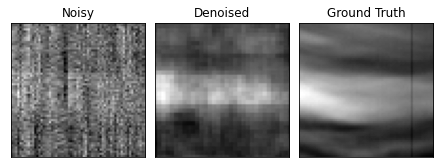

RMSE-NZ  Pred=0.0456  Noisy=0.1861 BEST
MAE-NZ   Pred=0.0406  Noisy=0.1834 BEST
PSNR     Pred=16.8 dB Noisy=4.6 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.92    Noisy=0.27
HOG MSE  Pred=0.20    Noisy=0.39
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_4_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_00_4_nitid_idx076.tif


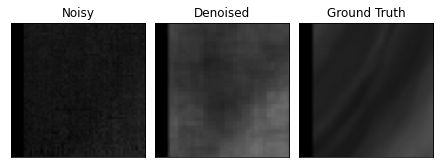

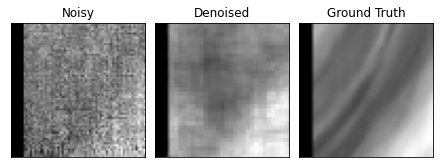

RMSE-NZ  Pred=0.1028  Noisy=0.0728 WORST
MAE-NZ   Pred=0.0921  Noisy=0.0602 WORST
PSNR     Pred=9.4 dB Noisy=12.4 dB WORST
Accuracy Pred=0.06    Noisy=0.04 BEST
SSM      Pred=0.73    Noisy=0.46
HOG MSE  Pred=0.12    Noisy=0.17
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_01_13_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_00_01_13_nitid_idx076.tif


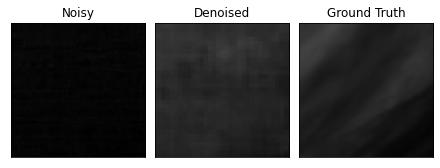

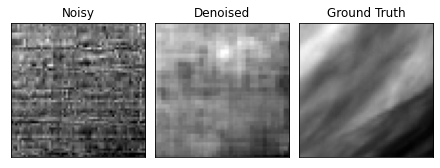

RMSE-NZ  Pred=0.0515  Noisy=0.1143 BEST
MAE-NZ   Pred=0.0453  Noisy=0.1044 BEST
PSNR     Pred=14.4 dB Noisy=7.5 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.78    Noisy=0.24
HOG MSE  Pred=0.25    Noisy=0.21
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_01_00_3_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0157_01_00_3_nitid_idx076.tif


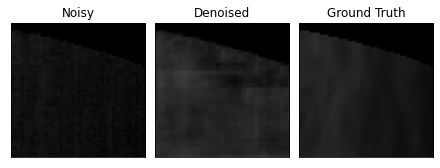

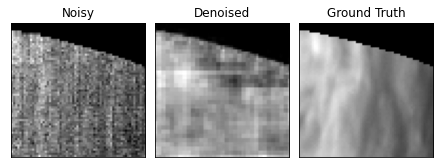

RMSE-NZ  Pred=0.0483  Noisy=0.0540 BEST
MAE-NZ   Pred=0.0382  Noisy=0.0470 BEST
PSNR     Pred=11.5 dB Noisy=10.6 dB BEST
Accuracy Pred=0.21    Noisy=0.08 BEST
SSM      Pred=0.77    Noisy=0.61
HOG MSE  Pred=0.08    Noisy=0.06
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_11_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_11_nitid_idx076.tif


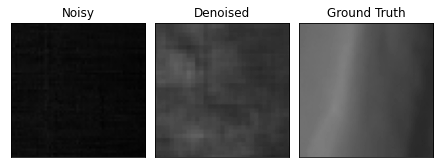

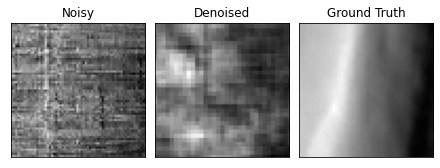

RMSE-NZ  Pred=0.1277  Noisy=0.3118 BEST
MAE-NZ   Pred=0.1057  Noisy=0.2974 BEST
PSNR     Pred=12.1 dB Noisy=4.4 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.68    Noisy=0.29
HOG MSE  Pred=0.31    Noisy=0.36
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_9_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0164_03_01_9_nitid_idx076.tif


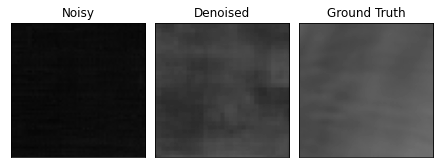

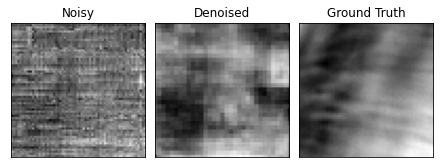

RMSE-NZ  Pred=0.1010  Noisy=0.2883 BEST
MAE-NZ   Pred=0.0938  Noisy=0.2864 BEST
PSNR     Pred=12.6 dB Noisy=3.5 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.81    Noisy=0.33
HOG MSE  Pred=0.06    Noisy=0.06
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_7_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_7_nitid_idx076.tif


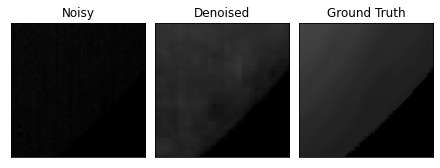

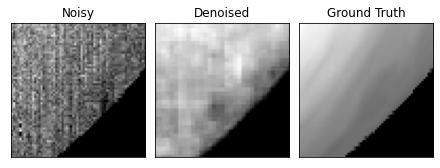

RMSE-NZ  Pred=0.0321  Noisy=0.1343 BEST
MAE-NZ   Pred=0.0244  Noisy=0.1226 BEST
PSNR     Pred=18.6 dB Noisy=6.2 dB BEST
Accuracy Pred=0.32    Noisy=0.11 BEST
SSM      Pred=0.89    Noisy=0.42
HOG MSE  Pred=0.09    Noisy=0.19
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_8_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0231_05_01_8_nitid_idx076.tif


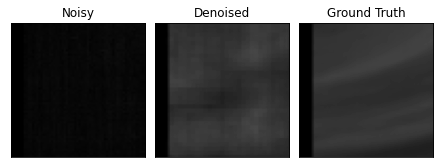

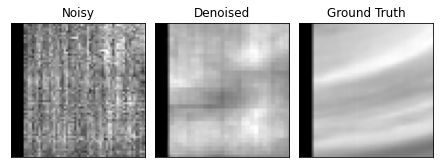

RMSE-NZ  Pred=0.0242  Noisy=0.1755 BEST
MAE-NZ   Pred=0.0186  Noisy=0.1729 BEST
PSNR     Pred=20.7 dB Noisy=3.5 dB BEST
Accuracy Pred=0.36    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.24
HOG MSE  Pred=0.10    Noisy=0.25
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0242_08_00_15_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0242_08_00_15_nitid_idx076.tif


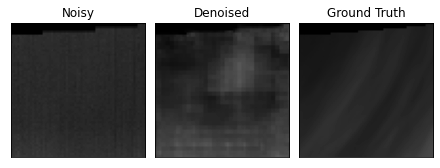

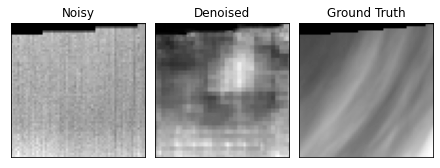

RMSE-NZ  Pred=0.0654  Noisy=0.0385 WORST
MAE-NZ   Pred=0.0507  Noisy=0.0294 WORST
PSNR     Pred=12.7 dB Noisy=17.3 dB WORST
Accuracy Pred=0.15    Noisy=0.25 WORST
SSM      Pred=0.72    Noisy=0.69
HOG MSE  Pred=0.26    Noisy=0.12
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0272_04_00_9_noisy_idx068.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0272_04_00_9_nitid_idx076.tif


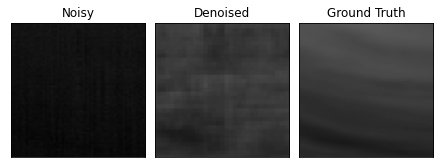

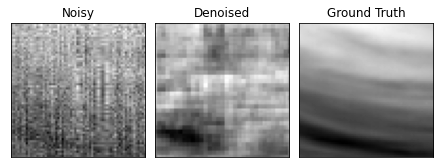

RMSE-NZ  Pred=0.0564  Noisy=0.1778 BEST
MAE-NZ   Pred=0.0441  Noisy=0.1697 BEST
PSNR     Pred=16.0 dB Noisy=6.0 dB BEST
Accuracy Pred=0.18    Noisy=0.00 BEST
SSM      Pred=0.86    Noisy=0.44
HOG MSE  Pred=0.28    Noisy=0.49
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0376_06_01_13_noisy_idx089.tif
C:/Projects/VenusDenoise/dataset/cases/64/0010_1000/test\VI0376_06_01_13_nitid_idx076.tif


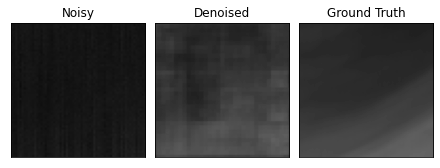

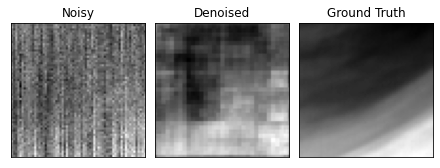

RMSE-NZ  Pred=0.0394  Noisy=0.1427 BEST
MAE-NZ   Pred=0.0319  Noisy=0.1285 BEST
PSNR     Pred=19.9 dB Noisy=8.8 dB BEST
Accuracy Pred=0.19    Noisy=0.00 BEST
SSM      Pred=0.84    Noisy=0.53
HOG MSE  Pred=0.26    Noisy=0.31
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )